Movies x TV Shows

Ranking de Países

Releases along the years

Duration

Month Adedd

How old are the TV shows?

Movie Rating Analysis

Genres Wordlcoud

Tv Shows - Numbers of seasons

In [30]:
# importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
# importando arquivo csv no Pandas
df = pd.read_csv(r"D:\Meu Drive\Colab Notebooks\Projetos\Netflix\netflix_titles.csv")

In [32]:
# visualizando primeiras entradas do dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [33]:
# visualizando nome das colunas e quantidade de dados
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

Text(0.0, 1.2, 'Netflix brand palette')

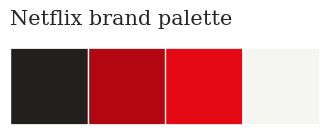

In [134]:
netflix_colors = ['#221f1f', '#b20710', '#e50914','#f5f5f1']
sns.palplot(netflix_colors)

plt.title("Netflix brand palette", loc='left', fontfamily='serif', fontsize=15, y=1.2)

plt.show()

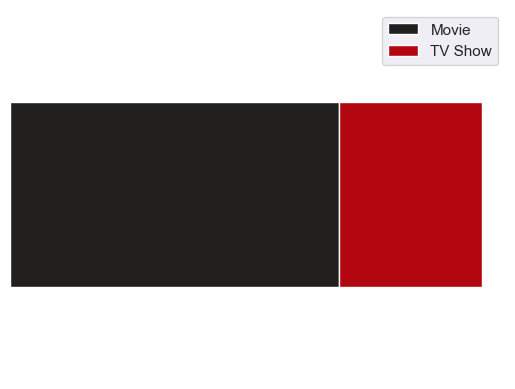

In [154]:
df.assign(dummy=1).groupby(['dummy','type']).size().to_frame().unstack().plot(kind='barh', stacked=True, legend=True, grid=False, color=netflix_colors)

plt.axis('off')
plt.legend(['Movie', 'TV Show'])

plt.show()

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


country
, France, Algeria                                      Axes(0.125,0.11;0.775x0.77)
, South Korea                                          Axes(0.125,0.11;0.775x0.77)
Argentina                                              Axes(0.125,0.11;0.775x0.77)
Argentina, Brazil, France, Poland, Germany, Denmark    Axes(0.125,0.11;0.775x0.77)
Argentina, Chile                                       Axes(0.125,0.11;0.775x0.77)
                                                                  ...             
Venezuela                                              Axes(0.125,0.11;0.775x0.77)
Venezuela, Colombia                                    Axes(0.125,0.11;0.775x0.77)
Vietnam                                                Axes(0.125,0.11;0.775x0.77)
West Germany                                           Axes(0.125,0.11;0.775x0.77)
Zimbabwe                                               Axes(0.125,0.11;0.775x0.77)
Length: 748, dtype: object

Error in callback <function _draw_all_if_interactive at 0x000002D9B6553880> (for post_execute):


KeyboardInterrupt: 

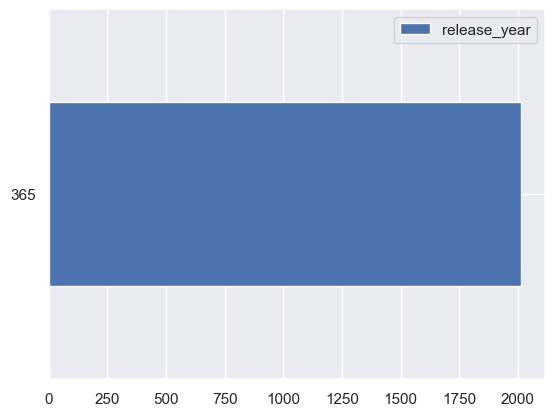

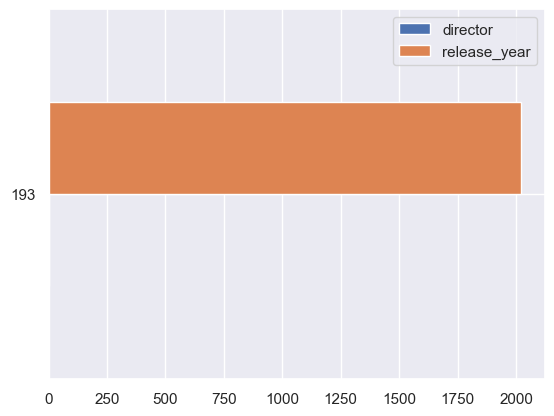

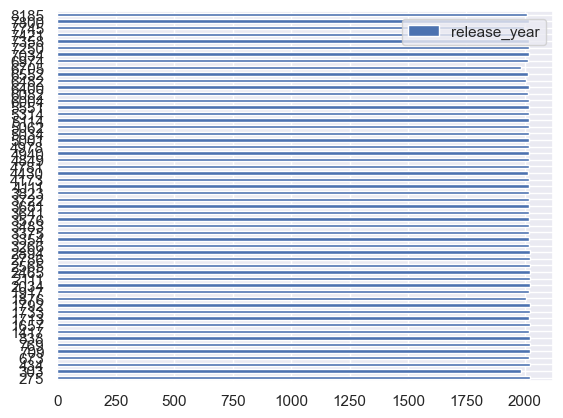

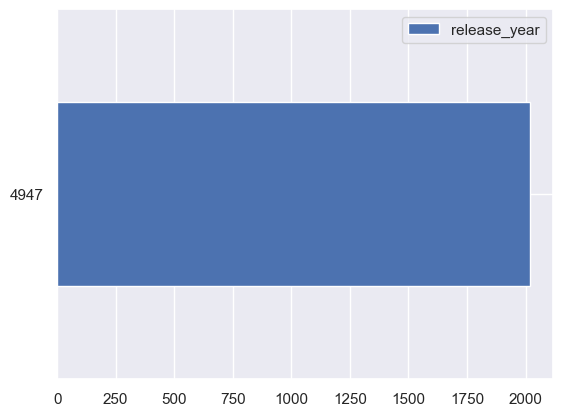

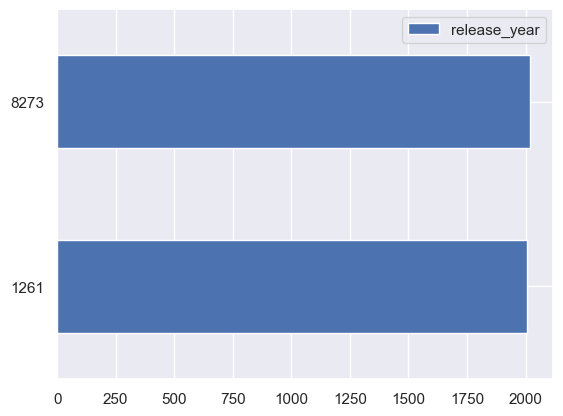

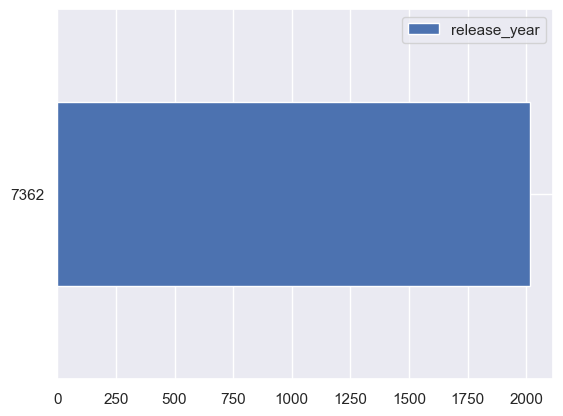

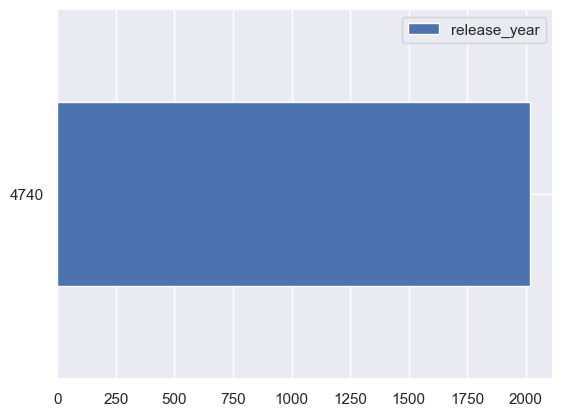

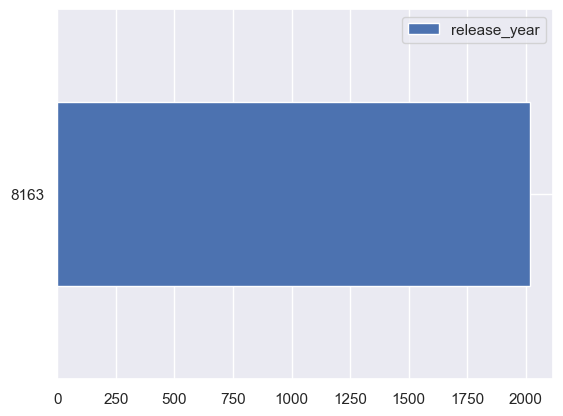

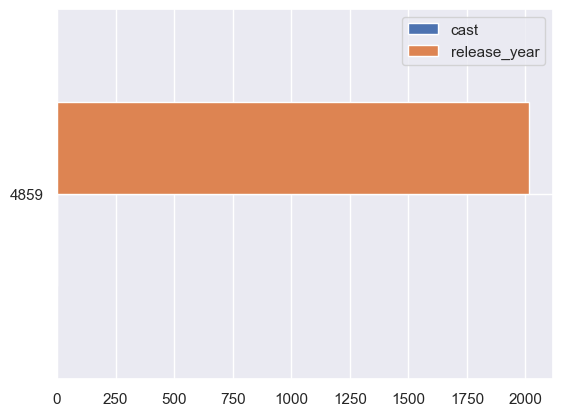

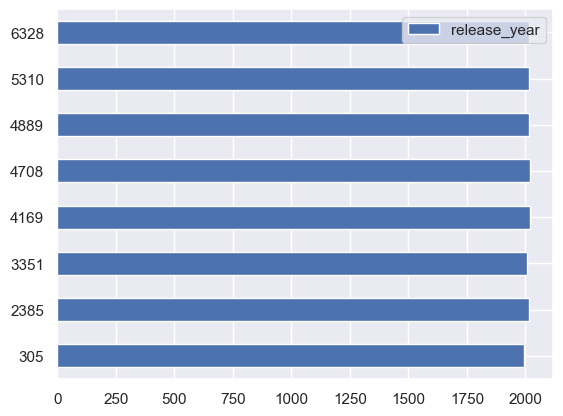

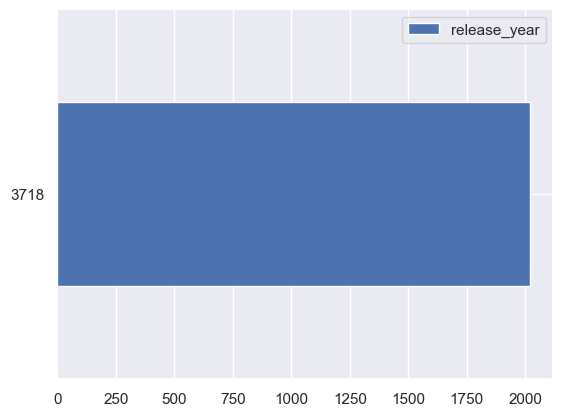

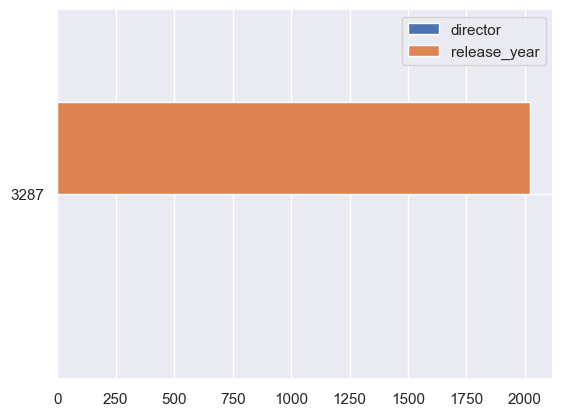

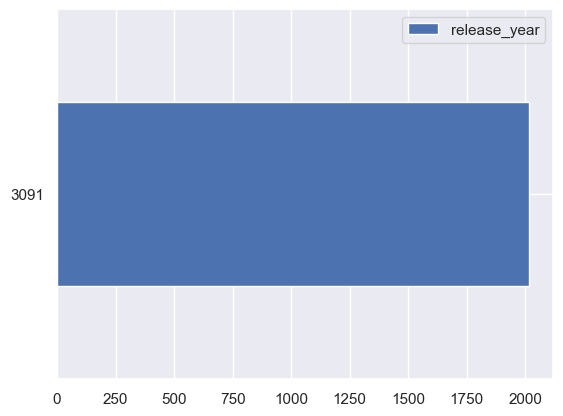

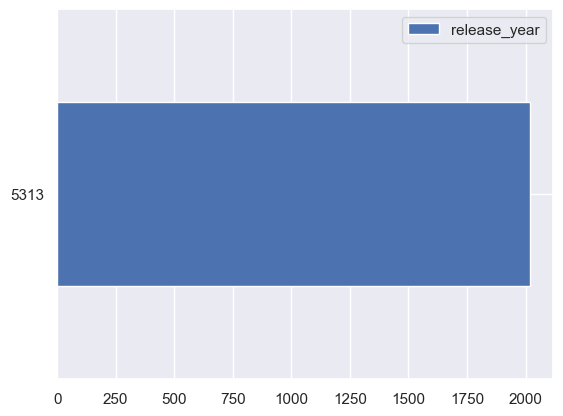

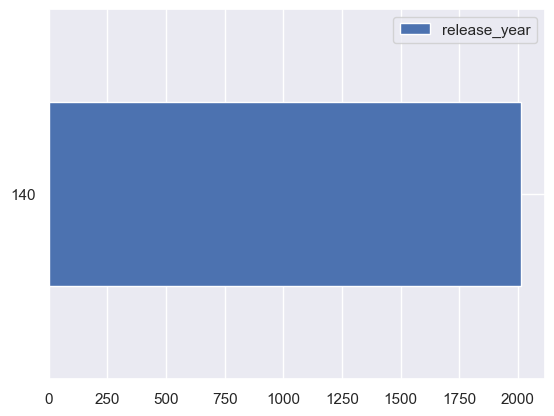

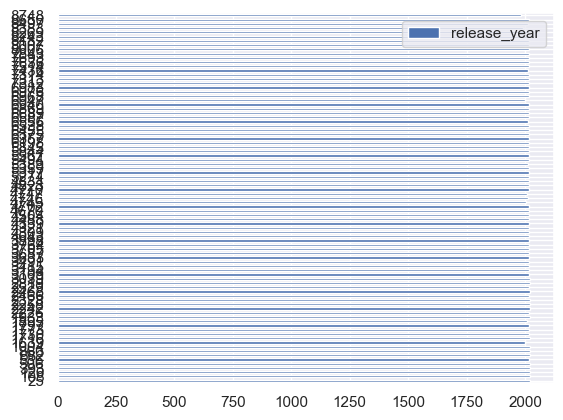

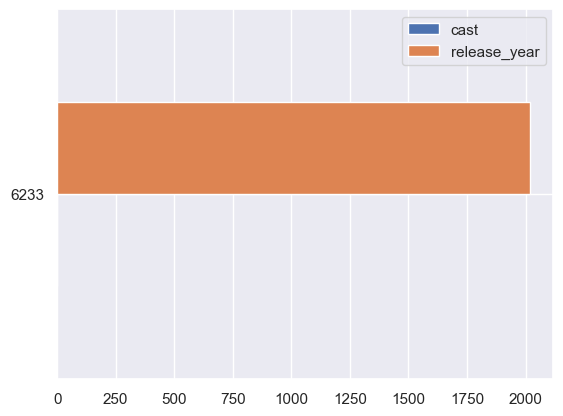

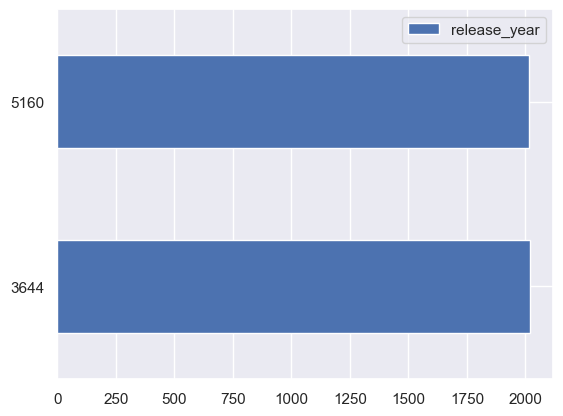

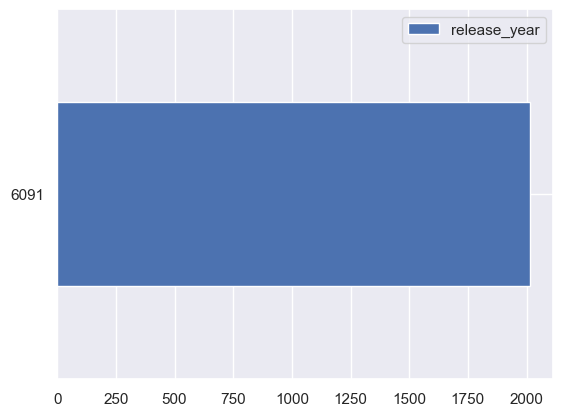

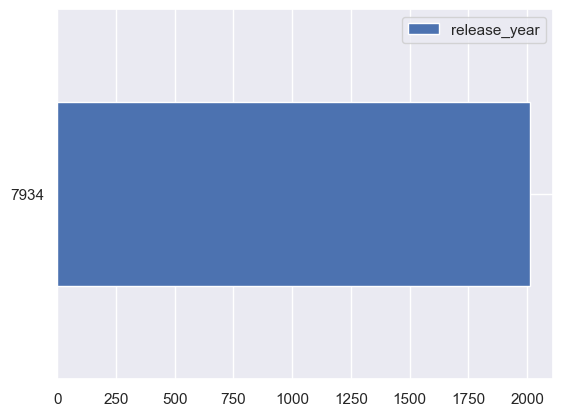

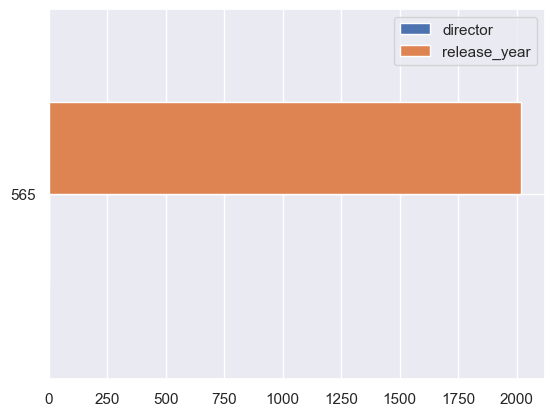

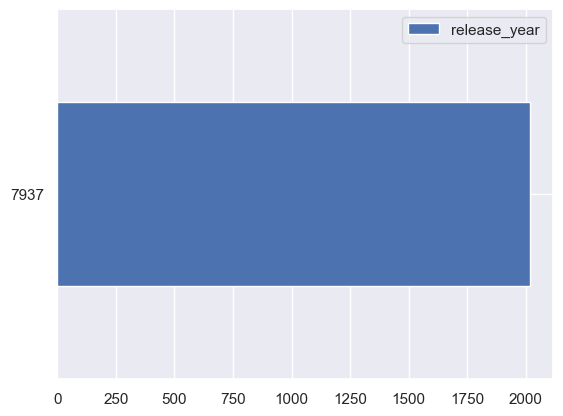

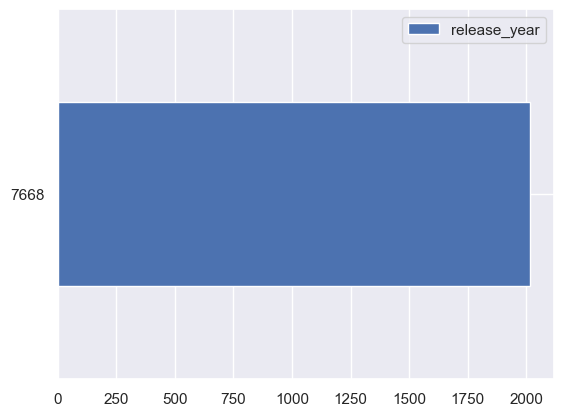

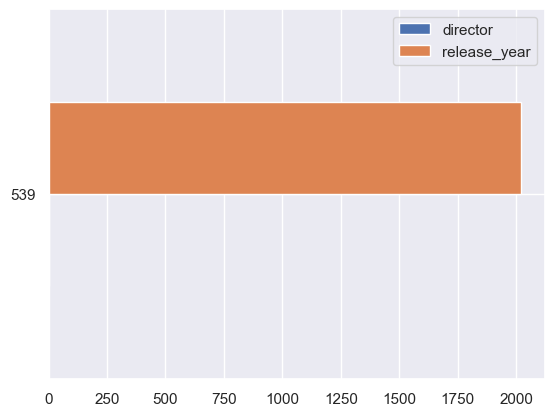

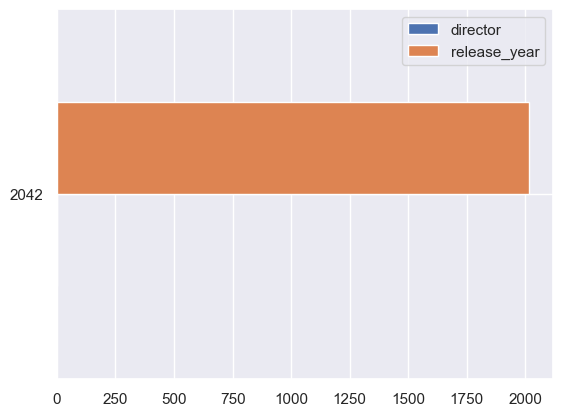

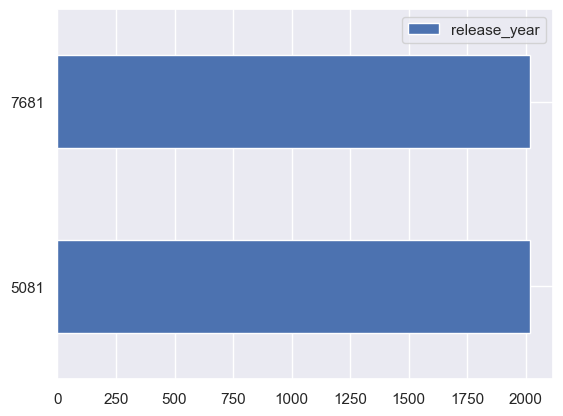

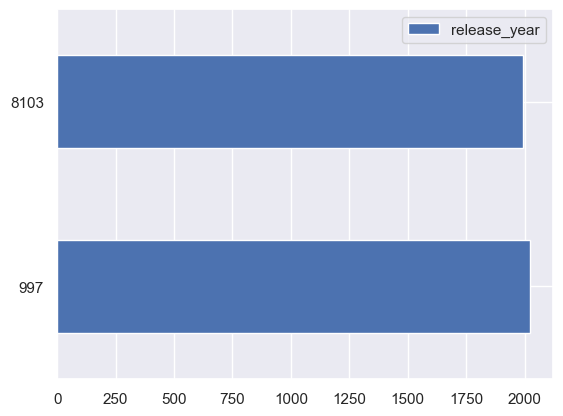

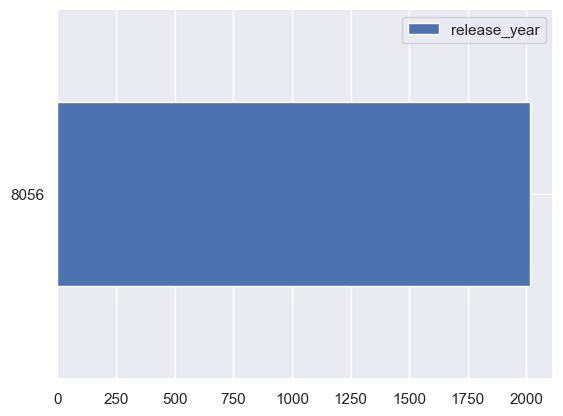

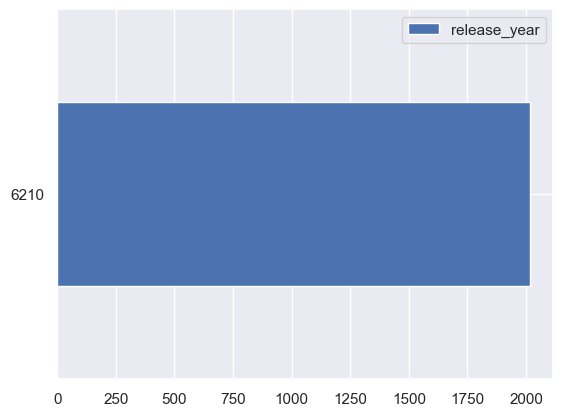

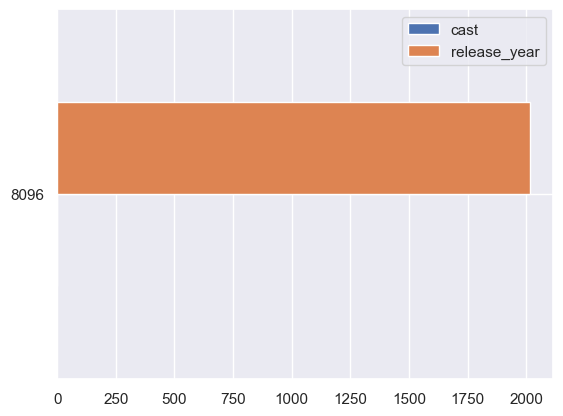

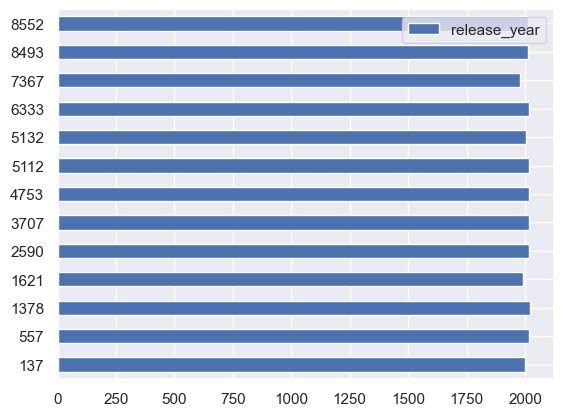

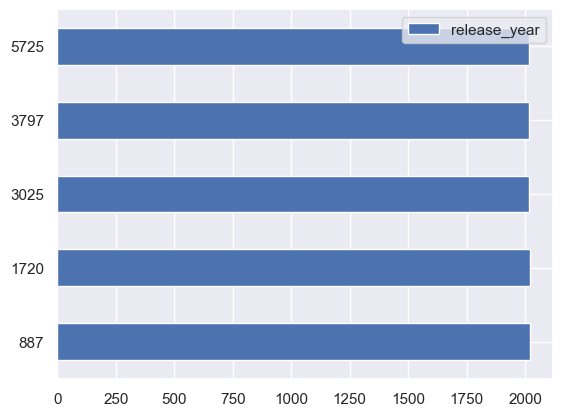

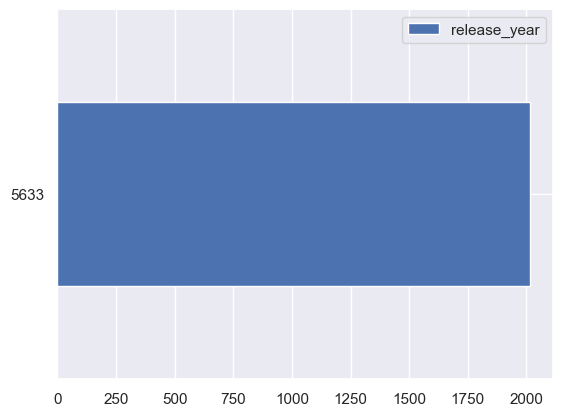

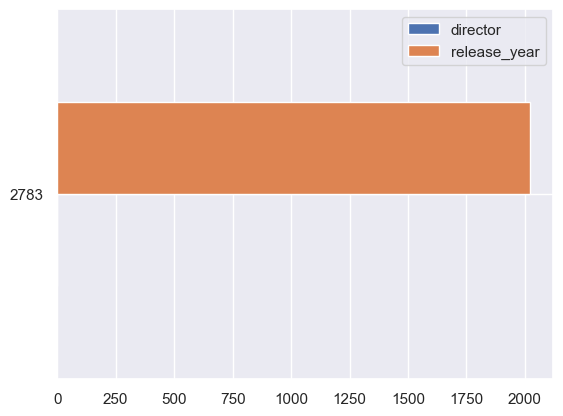

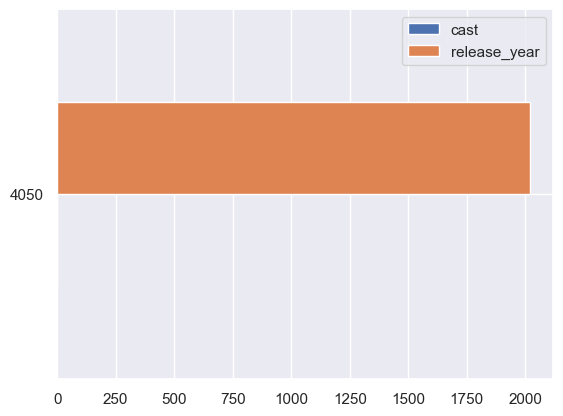

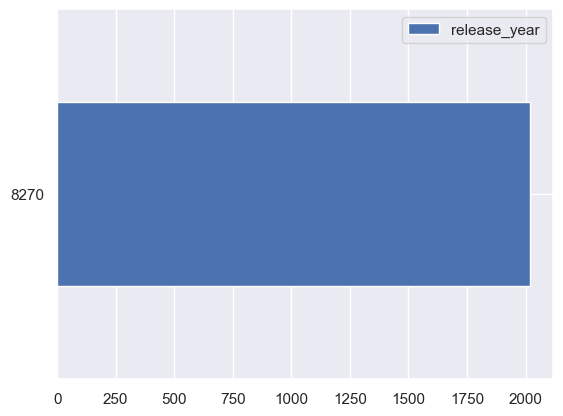

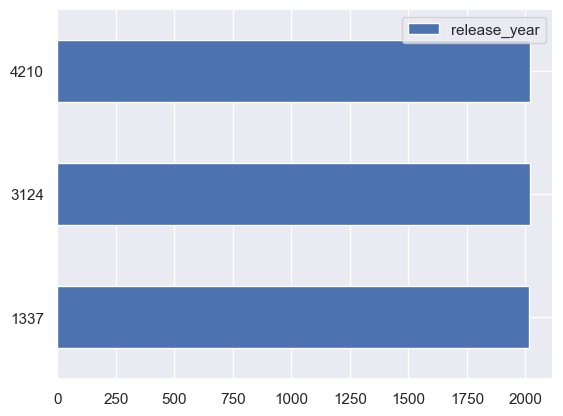

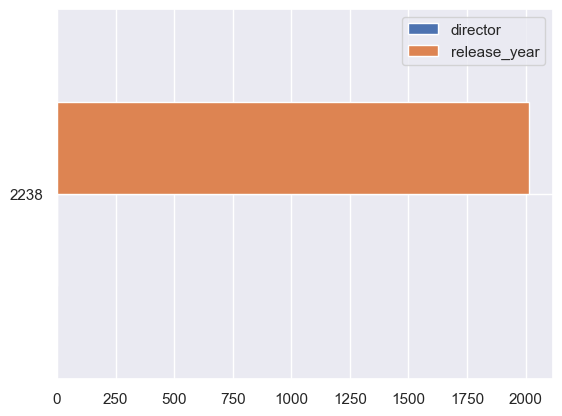

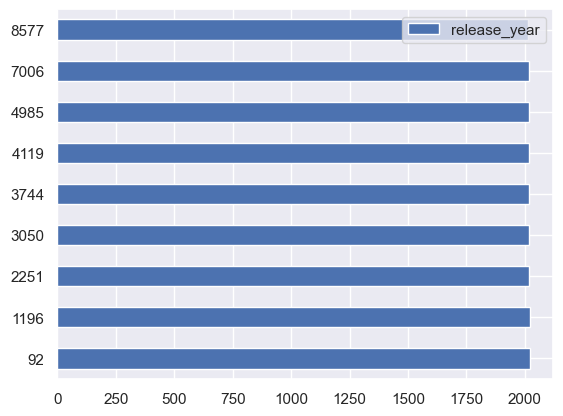

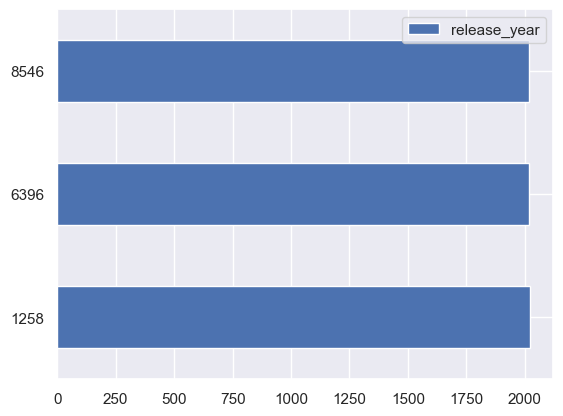

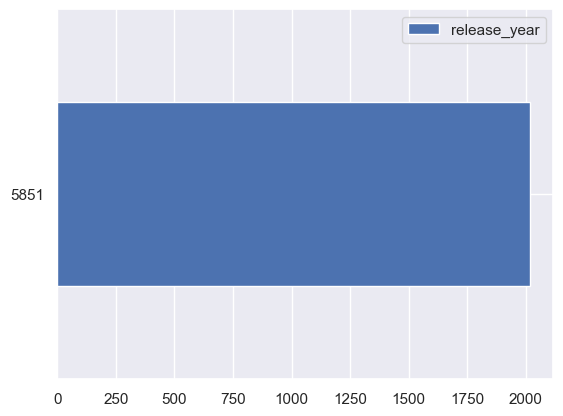

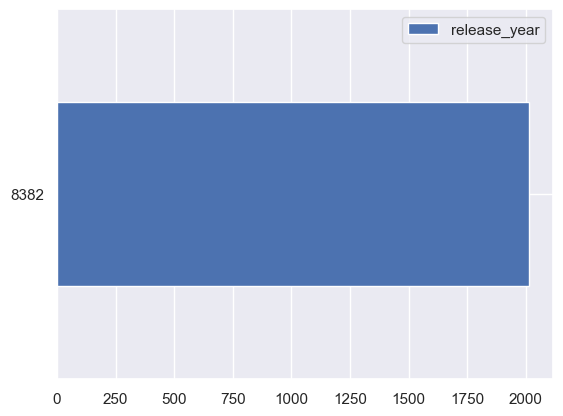

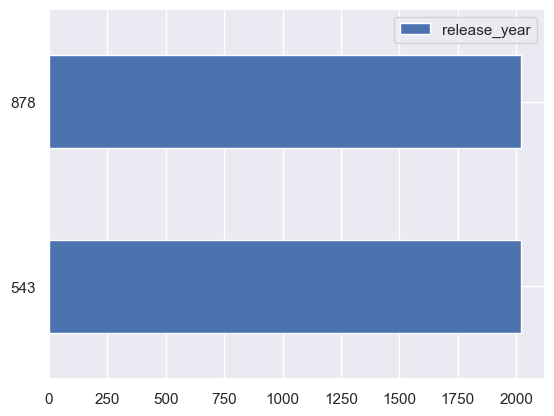

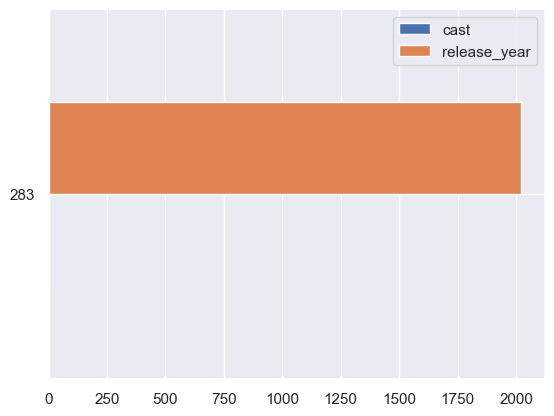

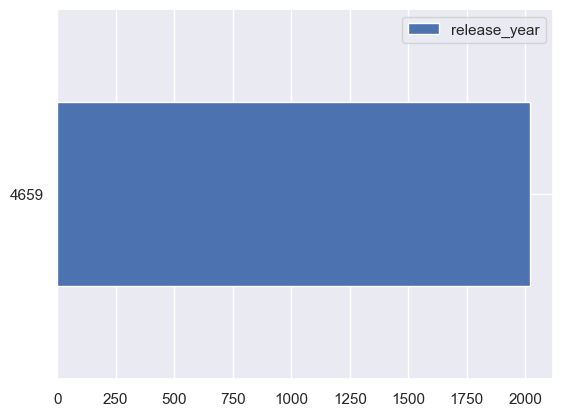

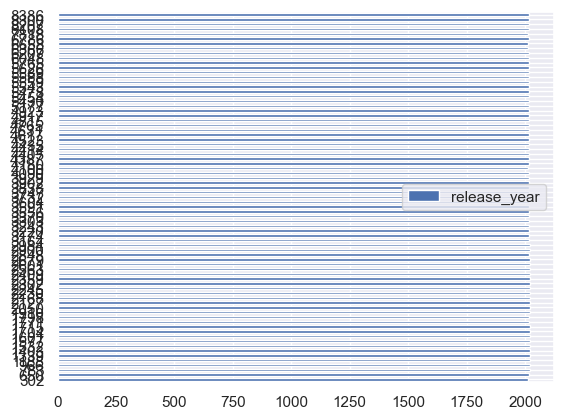

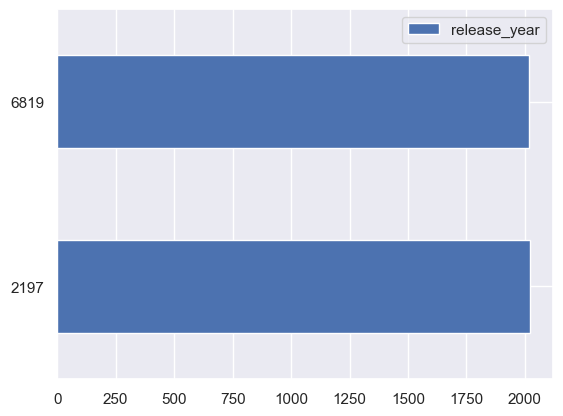

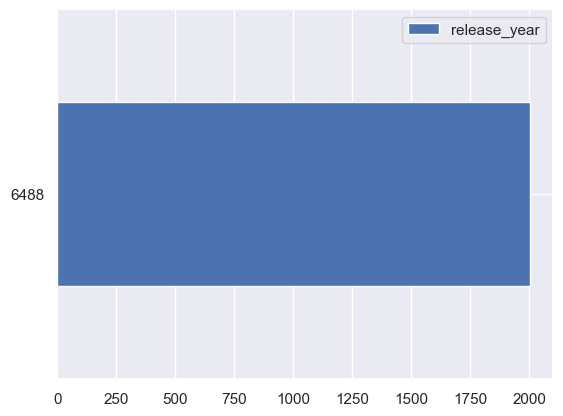

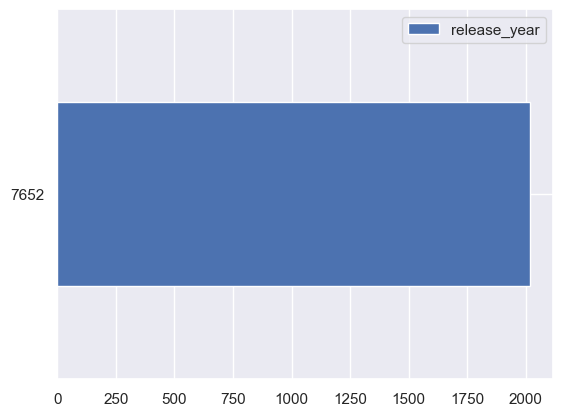

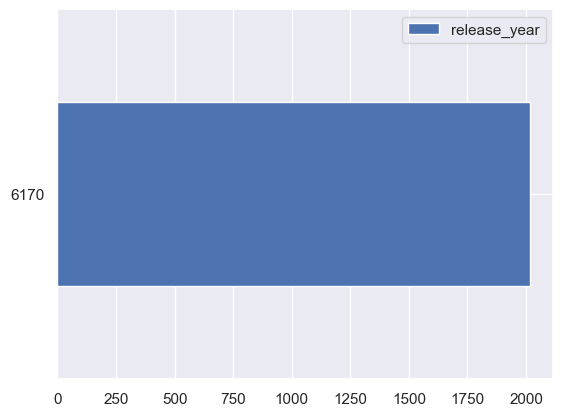

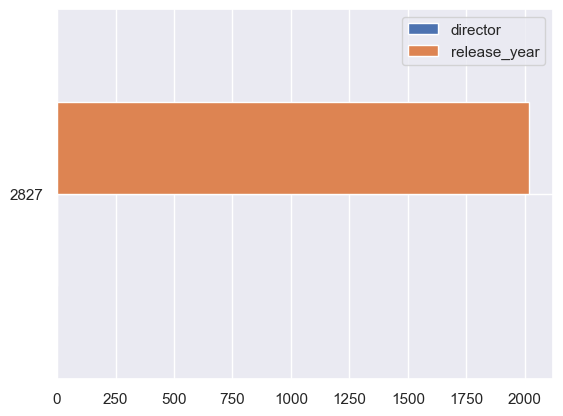

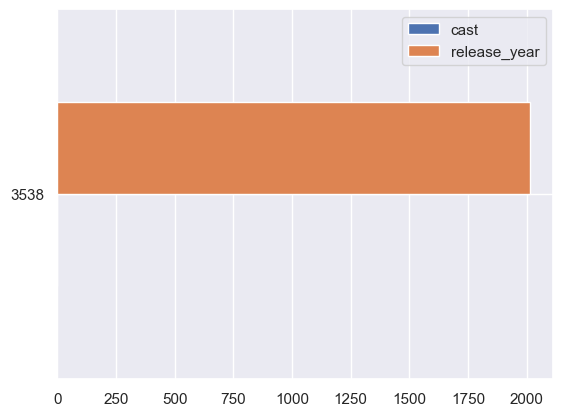

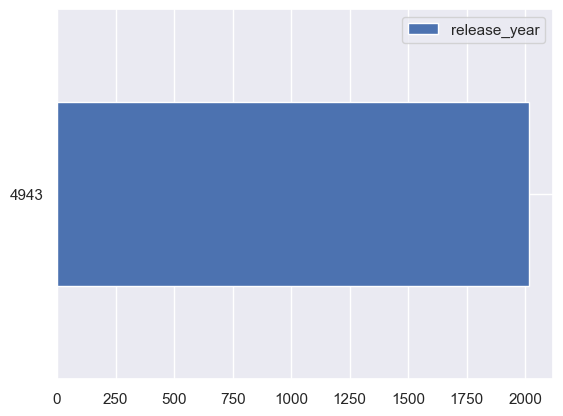

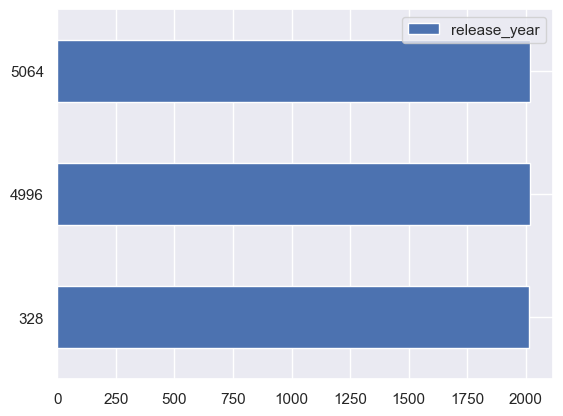

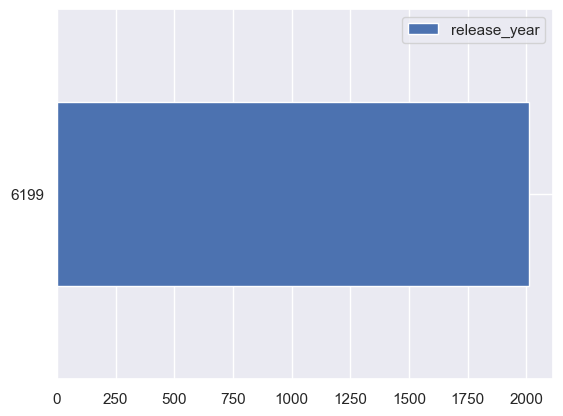

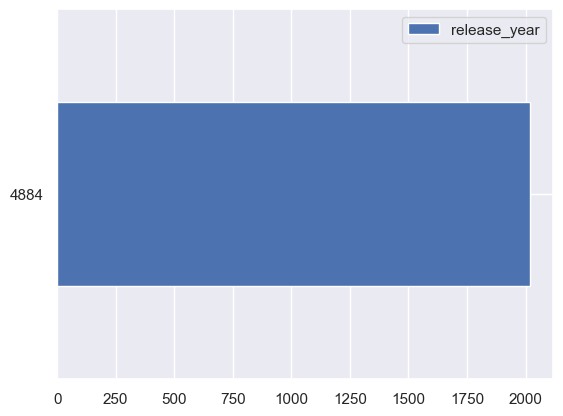

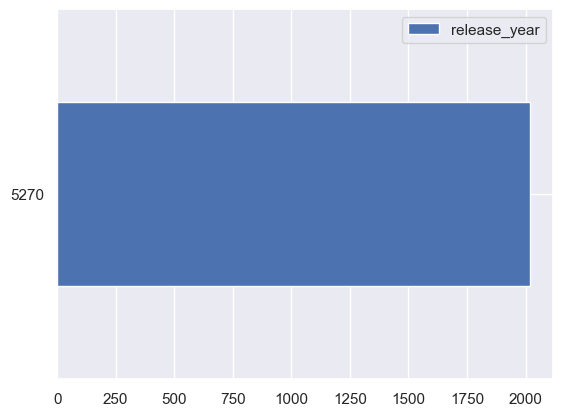

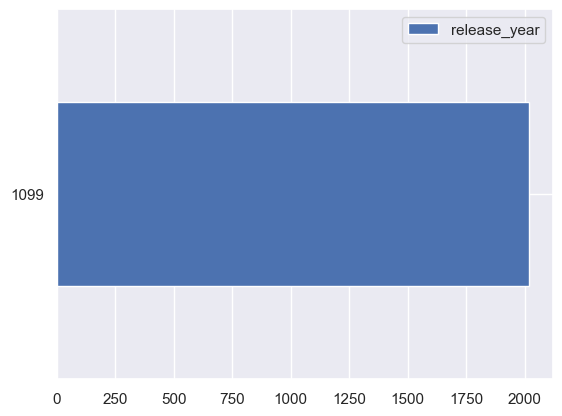

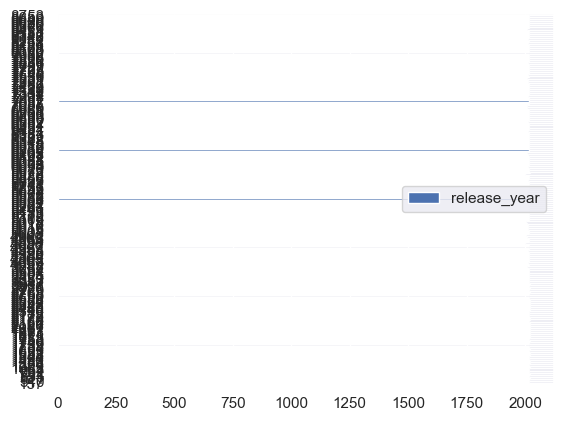

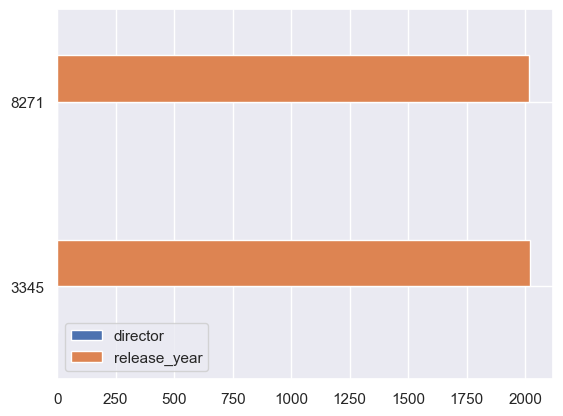

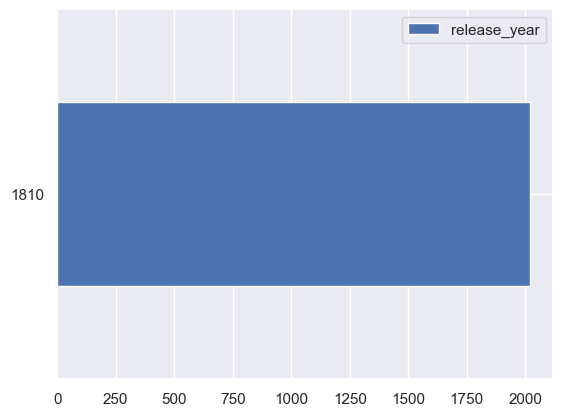

In [159]:
df.groupby(['country']).plot(kind='barh')